<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [64]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [65]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


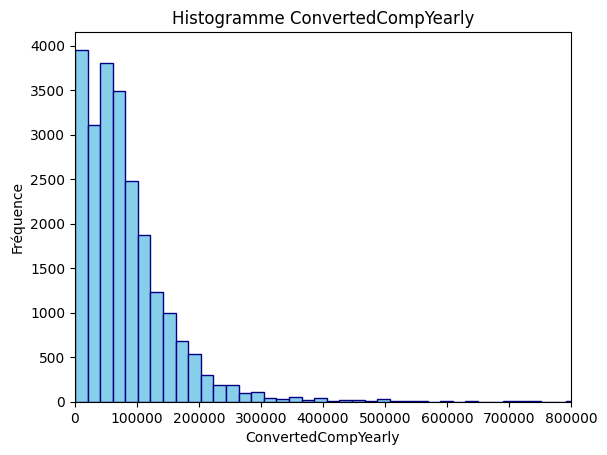

In [6]:
# histogramme
plt.hist(df['ConvertedCompYearly'], bins=800, color='skyblue', edgecolor='navy')
plt.title('Histogramme ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.xlim([0,0.08e7])
plt.ylabel('Fréquence')
plt.show()

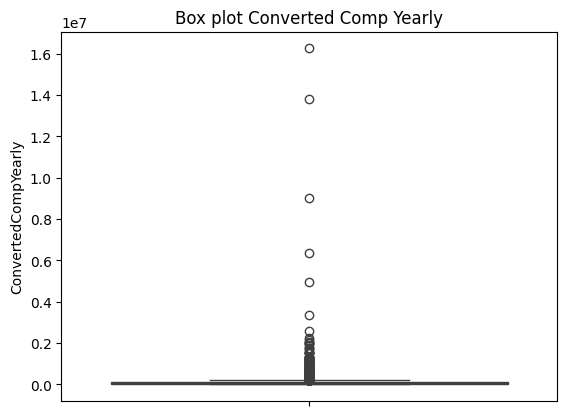

In [9]:
sns.boxplot(data=df['ConvertedCompYearly']) 
plt.title('Box plot Converted Comp Yearly') 
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [8]:
respondents_full_time = df[df['Employment']=='Employed, full-time']
print(respondents_full_time['ConvertedCompYearly'].median())

69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [ ]:
## Write your code here

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [67]:
df['ConvertedCompYearly'].median()

np.float64(65000.0)

In [10]:
#outliers
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3-Q1
higher_outliers = Q3 + (1.5*IQR) 
higher_outliers

np.float64(220860.75)

In [11]:
#new dataframe with variable ConvertedCompYearly filtered to remove outliers / high
df_convertedcompWO_outliers = df[df['ConvertedCompYearly']< higher_outliers]

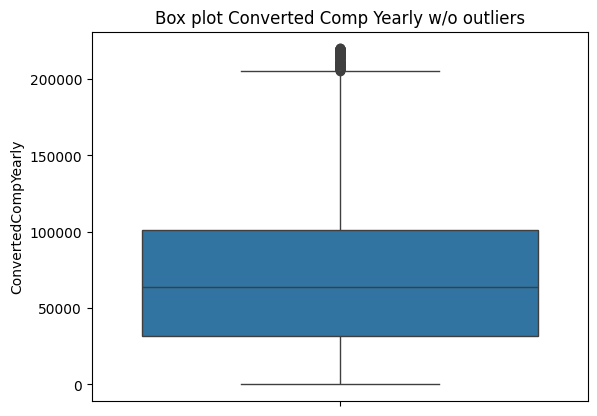

In [12]:
#box plot to check if new df and ConvertedCompYearly is w/o high outliers
sns.boxplot(data=df_convertedcompWO_outliers['ConvertedCompYearly']) 
plt.title('Box plot Converted Comp Yearly w/o outliers') 
plt.show()

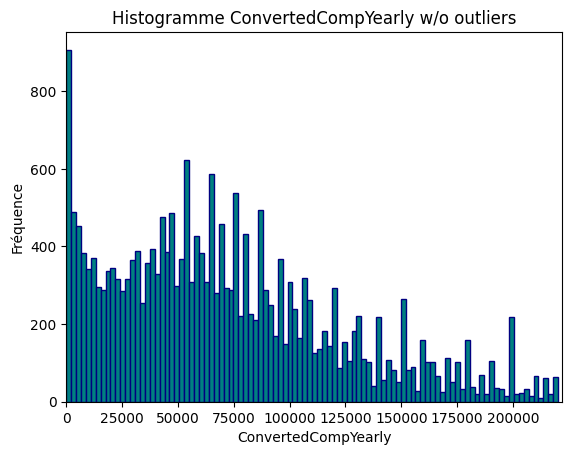

In [16]:
# histogramme
plt.hist(df_convertedcompWO_outliers['ConvertedCompYearly'], bins=100, color='teal', edgecolor='navy')
plt.title('Histogramme ConvertedCompYearly w/o outliers')
plt.xlabel('ConvertedCompYearly')
plt.xlim([0,222000])
plt.ylabel('Fréquence')
plt.show()

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


65000 entrees, trop d'entrees pour une heatmap !

➡️La variable ConvertedCompYearly est nettoyee des outleirs et des NaN dans la df: df_convertedcompWO_outliers['ConvertedCompYearly']

➡️Verifier la variable WorkExp

In [24]:
df['WorkExp'].unique()

array([nan, 17., 15., 12., 29., 10., 18., 16.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46., 43., 49., 47.])

In [25]:
print(df['WorkExp'].isnull().sum())

35779


In [20]:
df['WorkExp'].describe()

count    29658.000000
mean        11.466957
std          9.168709
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         50.000000
Name: WorkExp, dtype: float64

Cleaning Colonne WorkExp : remplacer NaN par la moyenne

In [69]:
WorkExp_mean = df['WorkExp'].mean()
df['WorkExp_cleaned']=df['WorkExp'].fillna(WorkExp_mean) 
print(df['WorkExp_cleaned'].isnull().sum())

0


➡️verifier la variable JobSatPoints_1

In [27]:
df['JobSatPoints_1'].dtype

dtype('float64')

In [28]:
df['JobSatPoints_1'].unique()

array([   nan,   0.  ,  50.  ,  10.  ,  90.  ,  30.  ,  20.  ,   5.  ,
         7.  ,  40.  ,  15.  ,  80.  ,  25.  ,  70.  ,  75.  ,  60.  ,
        33.  ,  35.  ,  22.  , 100.  ,  17.  ,   9.  ,   6.  ,   4.  ,
        34.  ,  45.  ,   8.  ,   1.  ,   3.  ,  14.  ,  29.  ,  67.  ,
         2.  ,  18.  ,  95.  ,  11.  ,  13.  ,  55.  ,  65.  ,  19.  ,
        39.  ,  12.5 ,  12.  ,  85.  ,  32.  ,  89.  ,  16.  ,  99.  ,
        71.  ,  27.  ,  57.  ,  77.  ,  26.  ,  88.  ,  78.  ,  76.  ,
        87.  ,  37.  ,  98.  ,  23.  ,  61.  ,   2.5 ,  86.  ,  24.  ,
        56.  ,  74.  ,  69.  ,  96.  ,  13.5 ,  81.  ,  44.  ,  79.  ,
        18.75,  66.  ,  21.  ,  28.  ,  38.  ,  52.  ,  49.  ,   3.75,
        68.  ,  91.  ,  37.5 ,  31.  ,   8.5 ,  63.  ,  47.  ,  97.  ,
        83.  ,  43.  ,   7.5 ,  36.  ])

In [29]:
print(df['JobSatPoints_1'].isnull().sum())

36113


In [30]:
df['JobSatPoints_1'].describe()

count    29324.000000
mean        18.581094
std         25.966221
min          0.000000
25%          0.000000
50%         10.000000
75%         22.000000
max        100.000000
Name: JobSatPoints_1, dtype: float64

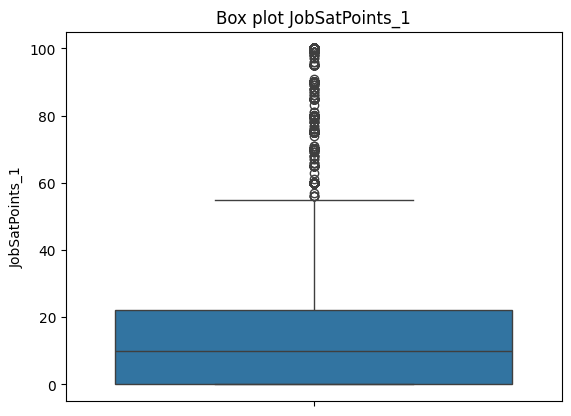

In [32]:
sns.boxplot(data=df['JobSatPoints_1']) 
plt.title('Box plot JobSatPoints_1')
plt.show()

➡️joindre les df et aggreger les data pour visualiser le heatmap

In [40]:
# Joindre df et df_convertedcompWO_outliers
joined_df = df.merge(df_convertedcompWO_outliers, on='ResponseId', how='inner')

➡️verifier le nom des colonnes dans la nouvelle df joined

In [41]:
joined_df.columns

Index(['ResponseId', 'MainBranch_x', 'Age_x', 'Employment_x', 'RemoteWork_x',
       'Check_x', 'CodingActivities_x', 'EdLevel_x', 'LearnCode_x',
       'LearnCodeOnline_x',
       ...
       'JobSatPoints_6_y', 'JobSatPoints_7_y', 'JobSatPoints_8_y',
       'JobSatPoints_9_y', 'JobSatPoints_10_y', 'JobSatPoints_11_y',
       'SurveyLength_y', 'SurveyEase_y', 'ConvertedCompYearly_y', 'JobSat_y'],
      dtype='object', length=229)

In [44]:
joined_df['WorkExp_cleaned'].head()

0     3.000000
1    11.466957
2     7.000000
3    11.466957
4     8.000000
Name: WorkExp_cleaned, dtype: float64

In [46]:
joined_df['JobSatPoints_1_x'].head()

0    90.0
1     NaN
2     0.0
3     NaN
4    10.0
Name: JobSatPoints_1_x, dtype: float64

In [54]:
joined_df['ConvertedCompYearly_y'].head()

0      7322.0
1     30074.0
2     91295.0
3     53703.0
4    110000.0
Name: ConvertedCompYearly_y, dtype: float64

In [47]:
print(joined_df[['ResponseId','WorkExp_cleaned', 'ConvertedCompYearly_y', 'JobSatPoints_1_x']].head())

   ResponseId  WorkExp_cleaned  ConvertedCompYearly_y  JobSatPoints_1_x
0          73         3.000000                 7322.0              90.0
1         375        11.466957                30074.0               NaN
2         380         7.000000                91295.0               0.0
3         386        11.466957                53703.0               NaN
4         390         8.000000               110000.0              10.0


In [49]:
correlation_matrix = joined_df[['WorkExp_cleaned', 'ConvertedCompYearly_y', 'JobSatPoints_1_x']].corr()

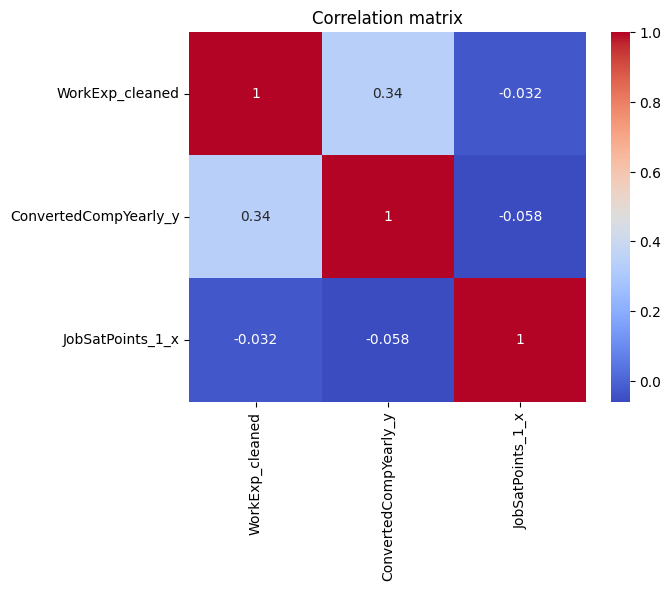

In [50]:
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=True) 
plt.title('Correlation matrix') 
plt.show()

In [56]:
subset_df = joined_df[['WorkExp_cleaned', 'ConvertedCompYearly_y', 'JobSatPoints_1_x']]

In [57]:
grouped_df = subset_df.groupby(['WorkExp_cleaned', 'ConvertedCompYearly_y']).mean()
print(grouped_df.head())

                                       JobSatPoints_1_x
WorkExp_cleaned ConvertedCompYearly_y                  
0.0             239.0                               0.0
                371.0                               8.0
                600.0                              10.0
                672.0                               0.0
                1148.0                              8.0


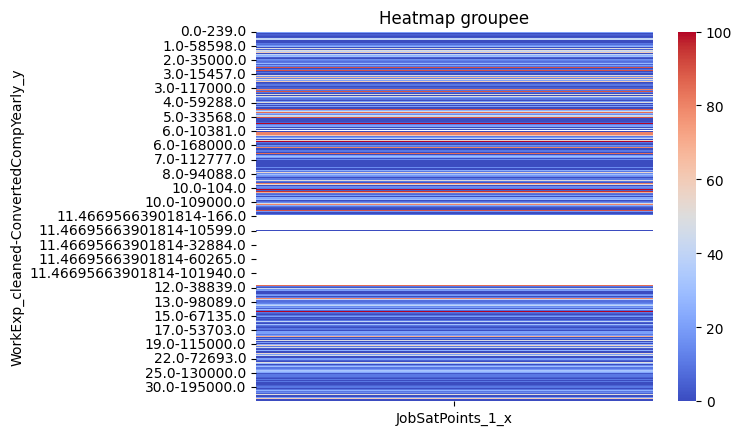

In [58]:
sns.heatmap(grouped_df,cmap='coolwarm')
plt.title('Heatmap groupee') 
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


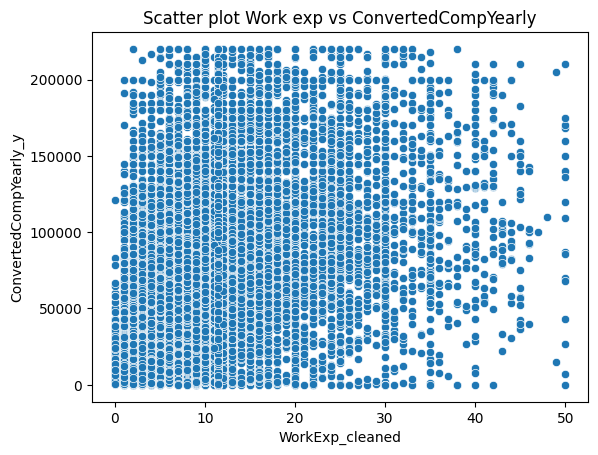

In [61]:
# Extraire les colonnes nécessaires
data = joined_df[['ConvertedCompYearly_y', 'WorkExp_cleaned']]

# Créer le scatter plot
sns.scatterplot(data=data, x='WorkExp_cleaned', y='ConvertedCompYearly_y')
plt.title('Scatter plot Work exp vs ConvertedCompYearly') 
plt.show()

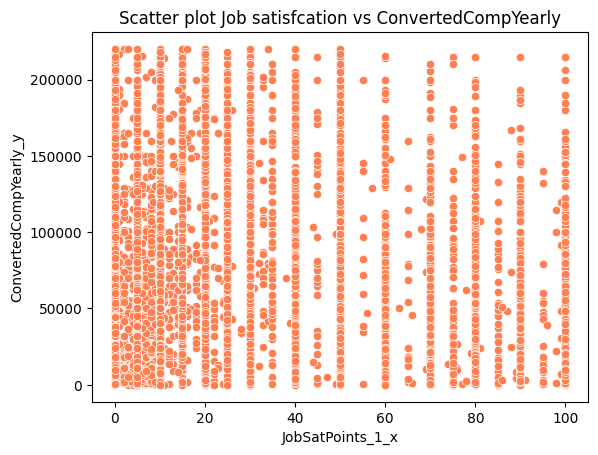

In [62]:
# Extraire les colonnes nécessaires
data_1 = joined_df[['ConvertedCompYearly_y', 'JobSatPoints_1_x']]

# Créer le scatter plot
sns.scatterplot(data=data_1, x='JobSatPoints_1_x', y='ConvertedCompYearly_y', color='coral')
plt.title('Scatter plot Job satisfcation vs ConvertedCompYearly') 
plt.show()

#correlation AgeNumerical et WorkExp_cleaned

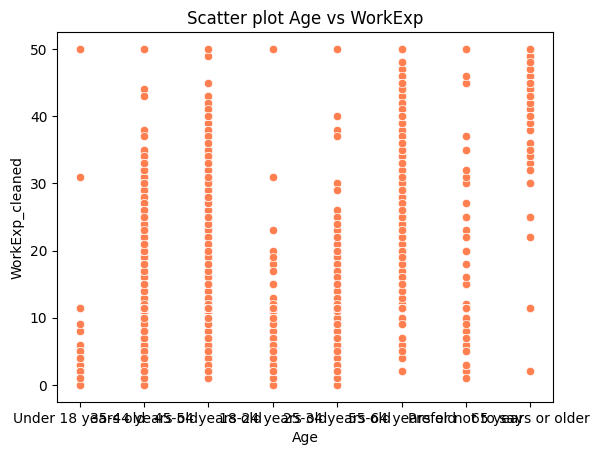

In [72]:
# Créer le scatter plot
sns.scatterplot(data=df, x='Age', y='WorkExp_cleaned', color='coral')
plt.title('Scatter plot Age vs WorkExp') 
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
